# Imported libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

/Users/jes/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

The Credit Card Approval dataset has been annonymised to protect the confidentiality of the data. All attribute names and values are meaningless symbols. Probable feature coulmn names have been included to illustrate a typical credit card application.

Column names: Gender, Age, Debt, Married, Bank Customer, Education Level, Ethnicity, Years Employed, Prior Default, Employed, Credit Score, Drivers License, Citizen, Zip Code, Income, Approved.

In [2]:
column_names = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education Level', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Drivers License', 'Citizen', 'Zip Code', 'Income', 'Approved' ]

In [3]:
#Importing the dataset, with the column names
data = pd.read_csv(r'crx.data', names = column_names)

# Exploratory Data Analysis

An initial analysis of the dataset and summary of its main characteristics, with visualisations.
 
The dataset is formed of 690 applicants and 16 application features. It comprises of numerical and non-numerical features, which contain missing entries and vaules from different ranges. 

At first glance, the 'Age' feature is non-numerical and should be coverted to an numerical data type, since it is a continous variable and assumed to be a key indicator when applying for a credit card; this would later be addressed. 

In [4]:
data.head()

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,Zip Code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
data.shape

(690, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              690 non-null    object 
 2   Debt             690 non-null    float64
 3   Married          690 non-null    object 
 4   Bank Customer    690 non-null    object 
 5   Education Level  690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   Years Employed   690 non-null    float64
 8   Prior Default    690 non-null    object 
 9   Employed         690 non-null    object 
 10  Credit Score     690 non-null    int64  
 11  Drivers License  690 non-null    object 
 12  Citizen          690 non-null    object 
 13  Zip Code         690 non-null    object 
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


To understand the underlying data, a correlation matrix was produced to illustate the correlation coefficients and any statistical relationship between the variables. As the correlation coefficients approach zero, the closer uncorrelated the variables are. Therefore, according to this correlation matrix, 'Years Employed' and 'Credit Score' are displayed as the most correlated variables, compared to rest of the variables. 

The question is posed: when applying for a credit card, can having a long credible history of employment positively impact a credit score? It can be assumed that it shows the ability to earn an income for a suitable duration, and in turn the individual can be trusted to pay back any credit incurred. This could be said to be a huge determinant for the approval decision. However, the scatter plot illustates that there is more of an increase in rejected credit card applications  with a no to low credit score, though an inidividual may have many years of employment.

<AxesSubplot:>

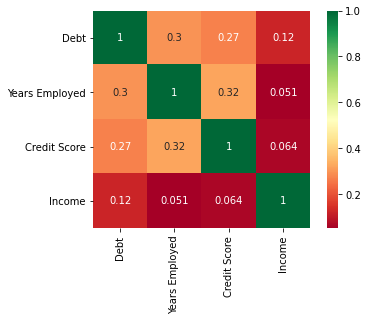

In [7]:
sns.heatmap(data.corr(), square=True, annot=True, cmap='RdYlGn')

<AxesSubplot:xlabel='Years Employed', ylabel='Credit Score'>

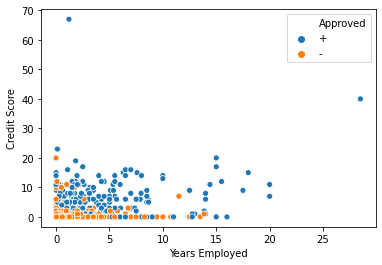

In [8]:
sns.scatterplot(data['Years Employed'], data['Credit Score'], hue=data['Approved'], sizes=(100,400), legend = 'full')

The target variables (classes), in this case are positive approvals (+) and negative approvals (-). There are approximately 55% postive approvals and 45% negative approvals. This is classed as fairly balanced target variables and very benefical for training the machine learning model. Imbalanced classes commonly dissort the accuracy when measuring the performance of the machine learning model.

<AxesSubplot:xlabel='Approved', ylabel='count'>

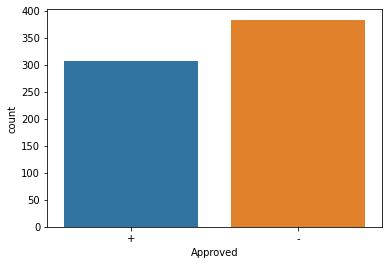

In [9]:
sns.countplot(data = data, x = 'Approved') 

In [10]:
data.describe()

,Debt,Years Employed,Credit Score,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [11]:
data.skew()

Debt               1.488813
Years Employed     2.891330
Credit Score       5.152520
Income            13.140655
dtype: float64

When visualising the data, the preliminary key features illustrate left tail of the distributions and the most skewed is 'Income'. 75% of applicants have an income of 395.50 and the maximum income of 10,000, showing that applicants with lower incomes are more likely to apply for credit cards. However, according to the boxplot, an individual is certainly more likely to be approved a credit card with a higher income. 

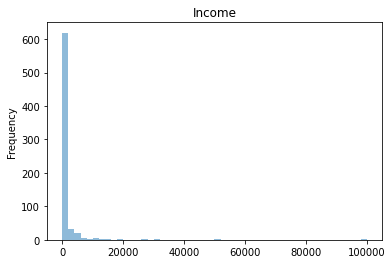

In [12]:
ax1= data['Income'].plot.hist(bins=50, alpha=0.5, title='Income')

<AxesSubplot:xlabel='Income', ylabel='Approved'>

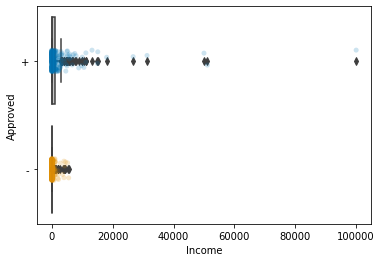

In [13]:
sns.stripplot(x=data['Income'], y=data['Approved'], data=data, palette='colorblind', alpha=0.2, dodge=True, jitter=True)
sns.boxplot(x=data['Income'], y=data['Approved'], data=data, palette='Greys')

# Missing Values

Everyday data is commonly known to include missing values or incomplete information. 

The 'is.null().sum()' method was used to check and manage Null values in the dataset, describing any missing values. However, results showed that the dataset did not include any Null values. At a closer look, the dataset did indeed include missing values, where these values were disguised as question marks, as opposed to Null values. As a solution, '.replace('?', np.nan)' was used to replace all question marks with np.NaNs.

In [14]:
# Returns the number of missing values in the dataset
data.isnull().sum()

Gender             0
Age                0
Debt               0
Married            0
Bank Customer      0
Education Level    0
Ethnicity          0
Years Employed     0
Prior Default      0
Employed           0
Credit Score       0
Drivers License    0
Citizen            0
Zip Code           0
Income             0
Approved           0
dtype: int64

In [15]:
data.tail(20)

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,Zip Code,Income,Approved
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [16]:
data[data.isin(["?"]).any(axis=1)]

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,Zip Code,Income,Approved
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


In [17]:
# Count of how many '?' in each column 
data.isin(['?']).sum(axis=0)

Gender             12
Age                12
Debt                0
Married             6
Bank Customer       6
Education Level     9
Ethnicity           9
Years Employed      0
Prior Default       0
Employed            0
Credit Score        0
Drivers License     0
Citizen             0
Zip Code           13
Income              0
Approved            0
dtype: int64

In [18]:
# Replace the '?' with NaN values
data = data.replace('?', np.nan)

# Preprocessing the data 

At the beginning of the process there was an attempt to convert the 'Age' feature into an numerical type from a non-numerical type. However, this was unsuccessful due to the initial missing values. The 'as.type('float)' converts this non-numeric feature to a numeric feature as floats.

In [19]:
data['Age'] = data['Age'].astype('float').round()

Preprocessing the data consisted of filling the NaN values of the numerical and non-numeric features with actual values, using the mean, and converting all the non-numeric features into numeric features. This preprocessing of the dataset results in faster computations when running the machine learning model.  

In [20]:
def prep_data(dataframe):
    
    # Make a copy of the dataset, to avoid corruption 
    df = dataframe.copy()
    
    # Impute the missing values with mean imputation
    df.fillna(df.mean(), inplace=True)
    
    # Rename the target variables into numeric values
    df.loc[df['Approved'] == '+', 'Approved'] = 1
    df.loc[df['Approved'] == '-', 'Approved'] = 0
    
    return(df)

# Input the orginal dataset into the function
data = prep_data(data)

In [21]:
# Iterate over each column 
for col in data.columns:
    
    # Check if the column is of object type
    if data[col].dtype == 'object':
        
        # Impute with the most frequent value
        data = data.fillna(data[col].value_counts().index[0])

In [22]:
# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column, extracting their dtypes and transforming them into numeric types.
for col in data.columns:
                        
    # Compare if the dtype is object
    if data[col].dtype == 'object':
        
        # Use LabelEncoder to do the numeric transformation
        data[col] = le.fit_transform(data[col])

In [24]:
# Result of converted features to numeric type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    int64  
 1   Age              690 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          690 non-null    int64  
 4   Bank Customer    690 non-null    int64  
 5   Education Level  690 non-null    int64  
 6   Ethnicity        690 non-null    int64  
 7   Years Employed   690 non-null    float64
 8   Prior Default    690 non-null    int64  
 9   Employed         690 non-null    int64  
 10  Credit Score     690 non-null    int64  
 11  Drivers License  690 non-null    int64  
 12  Citizen          690 non-null    int64  
 13  Zip Code         690 non-null    int64  
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In order to proceed with the machine learning model, the dataset has to be split into train and test sets and scaled to fit a machine learning model to the data. 

Scaling enables the features to be displayed in the same range (between 0-1). A failure to do this may create a poor model, since features with larger values will hinder the learning processing. Normalisation transforms features to be illustrated as a normal distribution. Data normalisation is useful in reducing and eliminating data redundancy. 

## Train and Test Split

In [25]:
# Drop the non essential features: 'Drivers License' and 'Zip Code' 
# Convert the DataFrame to a NumPy array
data = data.drop([data.columns[11], data.columns[13]], axis=1)
data = data.values

# Segregate features and labels into separate variables
X,y = data[:,0:13] , data[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform on training data
rescaledX_train = scaler.fit_transform(X_train) 

# Tranform on test data, on the parameters of the train data
rescaledX_test = scaler.transform(X_test) 

With a fairly balanced target variable, this calls for a binary classification with the Logistic Regression model, for predicting credit card approvals.

# Logistic Regression Model

In [27]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(solver='lbfgs')

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Performance Evaluation 

The model is tested on 33% of the data (approximately 228 applications) on the Logistic Regression model.

Using the predict_proba() function, the threshold is set to a standard of 0.5, which means that when the model predicts a probability greater than or equal to 0.5 for credit card approval, we should probably approve that person a credit card.

These results are very good in representing how accurately the model predicts on the test data. 

In [29]:
# Use logreg to output probability estimates from the test set
probas = logreg.predict_proba(rescaledX_test)

# Anything with a probability >= 0.5 becomes class 1, else class 0 
y_pred = (probas[:, 1] >= 0.5).astype(int)  


# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

array([[98, 27],
       [ 9, 94]])

Predicited Negative, True Negative = 98 out of 125, where denied applications predicted by the model correctly.

Predicted Positive, True Postive = 94 out of 103, approved applications predicted by the model correctly.

$$p(y=1|x)$$

is the output of the logistic regression model, which is the probability that person will be approved a credit card, illustrated by the second column, given the threshold of 0.5 .

In [30]:
print(probas)

[[0.84175403 0.15824597]
 [0.30079631 0.69920369]
 [0.94181871 0.05818129]
 [0.92511181 0.07488819]
 [0.9734551  0.0265449 ]
 [0.48844381 0.51155619]
 [0.97293109 0.02706891]
 [0.34678037 0.65321963]
 [0.94433224 0.05566776]
 [0.94015346 0.05984654]
 [0.92362598 0.07637402]
 [0.28228475 0.71771525]
 [0.94017598 0.05982402]
 [0.26479278 0.73520722]
 [0.80810964 0.19189036]
 [0.16683966 0.83316034]
 [0.96907964 0.03092036]
 [0.86386799 0.13613201]
 [0.9332243  0.0667757 ]
 [0.96575002 0.03424998]
 [0.86236418 0.13763582]
 [0.94195392 0.05804608]
 [0.97193638 0.02806362]
 [0.26580929 0.73419071]
 [0.97511098 0.02488902]
 [0.93146685 0.06853315]
 [0.04932822 0.95067178]
 [0.28149006 0.71850994]
 [0.93546642 0.06453358]
 [0.93221727 0.06778273]
 [0.1524044  0.8475956 ]
 [0.09749019 0.90250981]
 [0.28473042 0.71526958]
 [0.169403   0.830597  ]
 [0.30238477 0.69761523]
 [0.12814005 0.87185995]
 [0.04701882 0.95298118]
 [0.26382021 0.73617979]
 [0.15530493 0.84469507]
 [0.06113183 0.93886817]


The Area under the ROC curve provides an aggregate measure of performance across all possible classification thresholds. It illustrated a score of just above 90%.

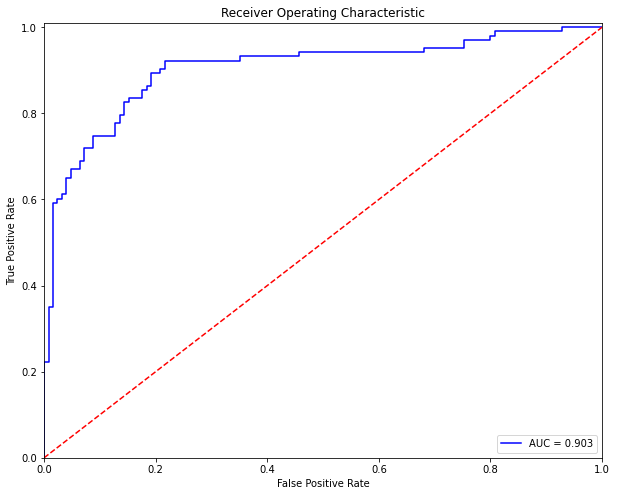

In [31]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
# Finding the optimal threshold

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold =', optimal_threshold) 

Optimal Threshold = 0.44469675678151


We find that the optimal threshold is actually around 0.44. This is the threshold that maximises the AUC score, which indirectly maximises precision and recall.

The class 0 (declined applications) are predicted with 92% precision, For class 1 (approved applications), it can predicted with 78% precision. Overall, The F1 Score is 84% for class 0.

In [33]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84       125
         1.0       0.78      0.91      0.84       103

    accuracy                           0.84       228
   macro avg       0.85      0.85      0.84       228
weighted avg       0.85      0.84      0.84       228



# Grid Searching 

To improve the performance of the model, Grid Search undertakes parameter tuning that will methodically build and evaluates the model for each combination of algorithm parameters specified in a grid. The Logistic Regression consists of different hyperparameters. The grid search would be carried out over the 'tol' and 'max_iter'.

The grid of hyperparameter values are defined and converted into a single dictionary format which GridSearchCV() expects as one of its parameters. The grid search then proceeds to see which values perform best.

GridSearchCV() is instantiated with the logreg model along with the dataset. Instead of passing train and test sets separately, the X (scaled version) and y is supplied. GridSearchCV() then to performs a cross-validation of five folds.

The parameter with the best results were with parameters of 100 iterations and a 0.01 tol and an accuracy score of 85%. 

In [34]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]
penalty = ['l2']

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter, penalty=penalty)
print(param_grid)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200], 'penalty': ['l2']}
Best: 0.850725 using {'max_iter': 100, 'penalty': 'l2', 'tol': 0.01}


## Conclusion

For a super strict classifier with a low false positive rate, the threshold should be set much higher, maybe 0.8/0.9. As a result, at class 1, the classifier is super confident about its prediction, where it will gain precision at the cost of lower recall. For a less strict classifier where it would be ideal to maximise TP rate and a number of FPs, then set the threshold lower. 

For example, where classifying whether you should give someone a credit card or not, if you set the threshold high, then only approvals for credit cards would be made to people who you are confident would not default on their credit card debt. Setting the threshold low, means taking a risk by giving credit cards to riskier customers who might not pay their debt. This is obviously a choice that companies have to make depending on the situation.

The ROC curve looks much better because it has been computed over many more thresholds because of predict_proba(). Whereas, at 0.5, this was not the optimum threshold. The ROC curve plot shows that the optimal threshold (of 0.44) and produces an AUC of 0.903, whereas 0.5 had an AUC of 0.84. Therefore, it would be beneficial to maximise AUC at that threshold. 

However, companies would often need to decide what kind of precision and recall is needed for thier business problem (credit card approval), and select threshold based on that.
